In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read table with the data
data = pd.read_csv('educ_grad5_1_Data.csv',sep=',',header=0)
#data.set_index('GEO',inplace=True)

In [3]:
#Have a look at the data. A good idea is to open an excel sheet as well
data.head()

,TIME,GEO,SEX,FIELD,ISCED97,UNIT,Value,Flag and Footnotes
0,2003,European Union (current composition),Total,Total,Upper secondary education (level 3) - pre-voca...,Number,"2,356,470",e
1,2003,European Union (current composition),Males,Total,Upper secondary education (level 3) - pre-voca...,Number,"1,296,835",e
2,2003,European Union (current composition),Females,Total,Upper secondary education (level 3) - pre-voca...,Number,"1,059,635",e
3,2003,European Union (before the accession of Croatia),Total,Total,Upper secondary education (level 3) - pre-voca...,Number,"2,321,636",e
4,2003,European Union (before the accession of Croatia),Males,Total,Upper secondary education (level 3) - pre-voca...,Number,"1,278,014",e


In [4]:
#Inspect the data type - string, ineger, float, series etc...
data.dtypes

TIME                   int64
GEO                   object
SEX                   object
FIELD                 object
ISCED97               object
UNIT                  object
Value                 object
Flag and Footnotes    object
dtype: object

In [5]:
#We see that TIME is set as an integer. Could be good to transform it to time series object.
#data['TIME'] =  pd.to_datetime(data['TIME'],format='%Y')

In [6]:
#table.loc([['European Union (current composition)'],['SEX','TIME','Value']])
#euro = data.loc['European Union (current composition)',['TIME','SEX','Value']]

In [7]:
#Value column is of object type, while it should be integer. To do convert it we remove the commas in the numbers, 
#as well as missing values indicated as ":"
data = data[data.Value.str.contains(":") == False]
data.loc[:,'Value'] = data.loc[:,'Value'].str.replace(',','').astype(str).astype(int)

In [8]:
#Check the data types again - now all seems to be in order
data.dtypes

TIME                   int64
GEO                   object
SEX                   object
FIELD                 object
ISCED97               object
UNIT                  object
Value                  int64
Flag and Footnotes    object
dtype: object

In [9]:
#Instead of opearting on the whole table we subset only an "interesting" part of it - with year,country,
#female&total number of degrees. Subsetting can be done in line. But doing it in bits is more comprehensive
data_part = data.loc[:,['TIME', 'GEO', 'SEX','Value']]
interest = data_part.SEX.str.contains("Total") == False
data_part = data_part[interest]
data_part.dtypes

TIME      int64
GEO      object
SEX      object
Value     int64
dtype: object

In [10]:
#We can group the data and visualise the table. However absolute values are of not much interest to us.
#We would like to see how the number of females with degrees invilves in time as a percentage of
#the total degress awarded
grouped = data_part.groupby(['GEO','TIME','SEX']).mean()
data_p = grouped.groupby(level=[0, 1]).apply(lambda x: x / x.sum()).reset_index()
female = data_p.SEX.str.contains("Male") == False
data_fem = data_p[female]
data_year = data_fem.groupby(['TIME']).agg(['mean', 'std']).Value.reset_index()
data_year.to_csv('average_degrees.csv',sep=",")

In [11]:
data_fem = data_fem.drop(['SEX'],axis=1)
data_fem.set_index(['TIME','GEO'],inplace=True)
data_fem

,,Value
TIME,GEO,
2003,Albania,0.374413
2006,Albania,0.352697
2003,Austria,0.418716
2005,Austria,0.437691
2007,Austria,0.427047
2008,Austria,0.423090
2009,Austria,0.419345
2010,Austria,0.422636
2011,Austria,0.416113


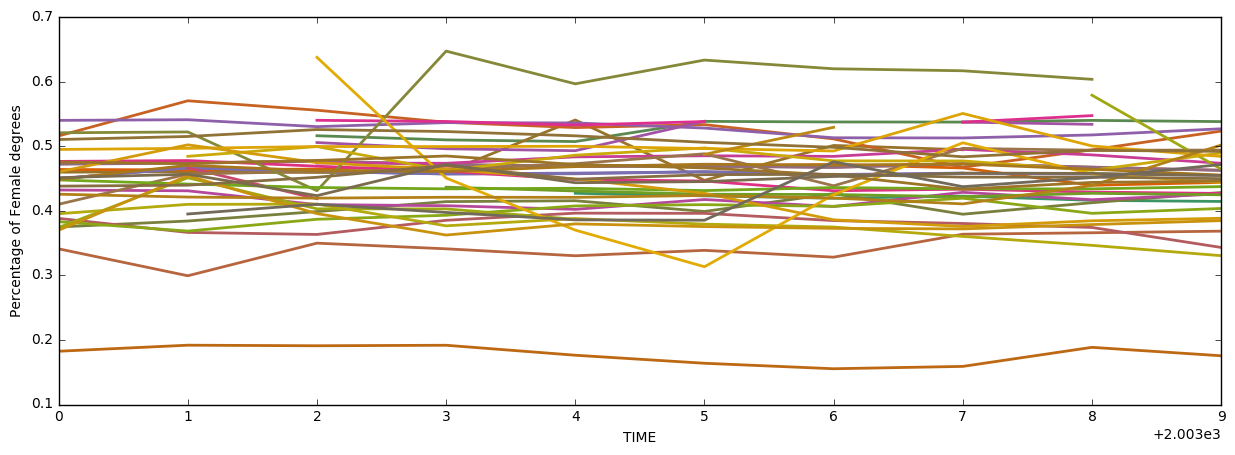

In [12]:
#And finally plotting!
fig, ax = plt.subplots(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Percentage of Female degrees')
data_fem.unstack().plot(ax=ax,cmap='Dark2',lw=2,legend=None)
#data_year.plot(ax=ax,lw=3,legend='Average')
#plt.scatter(x,y)
#data_fem.plot(x, y, cmap='spring',lw=2,legend=None)
#euro.groupby(['TIME','SEX']).mean()['Value'].unstack().plot(ax=ax,cmap='spring',lw=2)
plt.show()

In [13]:
data_fem.reset_index()
data_fem = data_fem.unstack()
data_fem.columns = data_fem.columns.droplevel()


In [14]:
data_fem

GEO,Albania,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Euro area (17 countries),...,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom
TIME,,,,,,,,,,,,,,,,,,,,,
2003,0.374413,0.418716,0.528201,0.374905,0.459695,0.182470,0.463887,0.515885,0.341037,0.472663,...,0.369864,NaN,0.425608,0.448446,0.475412,0.510286,0.438088,0.451264,NaN,NaN
2004,NaN,NaN,NaN,0.384117,0.460551,0.191827,0.463215,0.570282,0.299328,0.474237,...,0.454254,NaN,0.421203,0.470335,0.473052,0.515013,0.439566,0.456563,0.394978,NaN
2005,NaN,0.437691,0.516156,0.398736,0.459233,0.190947,0.464511,0.555681,0.349838,0.477051,...,0.395541,NaN,0.419532,0.461901,0.477927,0.525728,0.451807,0.423383,0.410102,NaN
2006,0.352697,NaN,0.509727,0.414132,0.459745,0.191736,0.468880,0.537001,0.341056,0.471865,...,0.362389,NaN,0.420903,0.460707,0.484768,0.522631,0.470096,0.471908,0.397366,NaN
2007,NaN,0.427047,0.507158,0.415499,0.540495,0.176289,0.470151,0.528779,0.330293,0.468649,...,0.379658,NaN,0.420760,0.468377,0.471654,0.516039,0.448774,0.443389,0.385885,NaN
2008,NaN,0.423090,0.538408,0.398882,0.447115,0.163855,0.469039,0.533365,0.338686,0.469212,...,0.375471,0.487270,0.423646,0.472012,0.466327,0.505920,0.455860,0.445123,0.385337,0.50874
2009,NaN,0.419345,0.537469,0.426501,0.501125,0.155365,0.471616,0.511254,0.328118,0.467285,...,0.372722,0.529193,0.419666,0.470859,0.455389,0.498228,0.456405,0.453077,0.475818,NaN
2010,NaN,0.422636,0.537308,0.394647,0.494467,0.158999,0.466236,0.467395,0.363660,0.472929,...,0.371898,NaN,0.410596,0.472341,0.433298,0.483568,0.452035,0.458259,0.437267,NaN
2011,NaN,0.416113,0.539914,0.412441,NaN,0.188525,0.439375,0.494409,0.365923,0.467586,...,0.378618,NaN,0.439212,0.464291,0.443889,0.493589,0.452035,0.457853,0.451375,NaN


In [15]:
import seaborn as sns

In [16]:
fig= plt.subplots(figsize=(15,3))
ax = plt.axes()

In [17]:
sns.heatmap(data_fem, cmap='Spectral_r', linewidths=0.5, annot=False, )
ax.set_title('Percentage of Female Obtaining Post-Secondary Education\n (from College to PhD)')

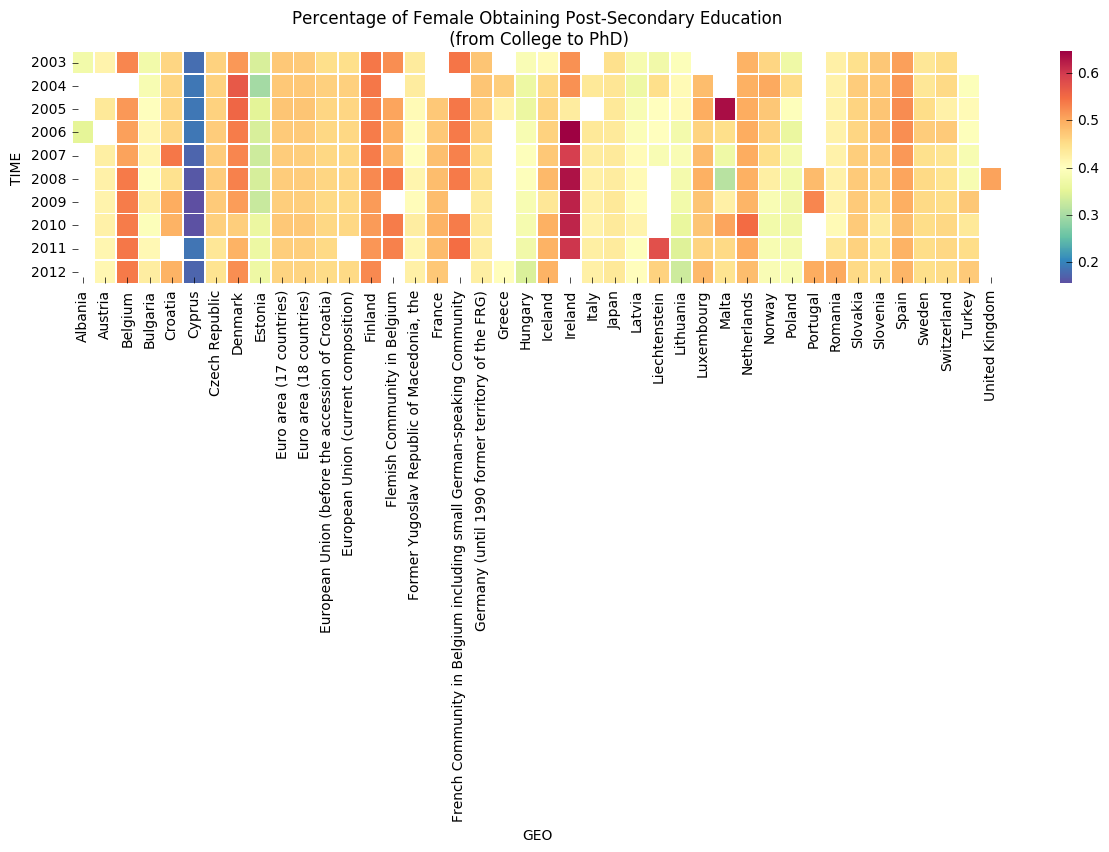

In [18]:
plt.show()